###This program is a project for internship  at Codesoft .This is customer churn project.

Customer churn is the loss of clients or customers.All the banks from all over the world have complete data of their customers and by using bthat data banks can predict whether the particular customer will stay or leave.
This program is a machine learning model which predicts whether the customer will stay or leave.
the dataset use in this program is from kaggle.
https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

In [65]:
##Importing all the necessary libraries 



import pandas   as pd 

import numpy as np
import matplotlib.pyplot as plt 





In [66]:
##reading the data from the csv file and processing it 

data=pd.read_csv("C:\Desktop\PROJECTS\codsoft\CodSoft-Tasks\customer_churn_prediction\Churn_Modelling.csv")

In [67]:
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [68]:
print(data.shape)


(10000, 14)


In [69]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [72]:
#Preprocessing  by using det_dummies method or one_hot_encoding method


data=pd.get_dummies(data)



data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,0,0,0,0,0,1,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,0,0,0,0,0,1,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,0,0,0,0,0,1,0,0,1,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,1,0,0,1


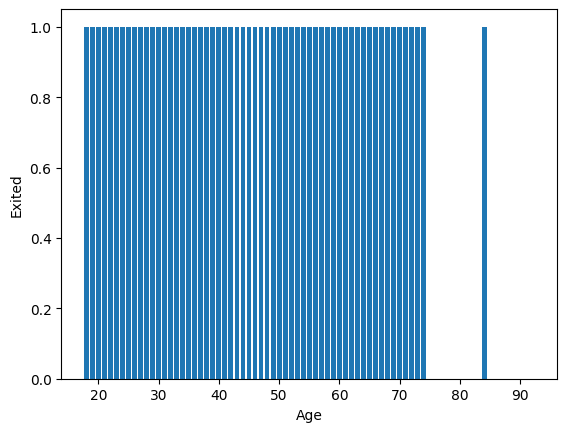

In [73]:
##visualizing the data we already have 

plt.bar(data["Age"],data["Exited"])


plt.xlabel("Age")
plt.ylabel("Exited")

plt.show()

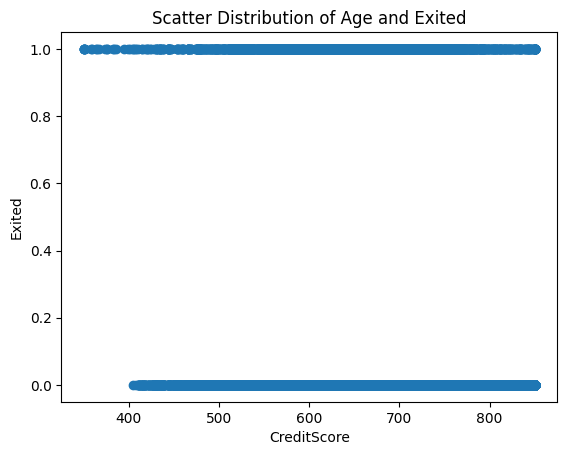

In [74]:
plt.scatter(data["CreditScore"],data["Exited"])


plt.xlabel("CreditScore")
plt.ylabel("Exited")
plt.title("Scatter Distribution of Age and Exited")



plt.show()

In [75]:
#feature scaling  by using normalisation and standardization 


from sklearn.preprocessing  import StandardScaler , MinMaxScaler


std_scale=StandardScaler()

standard_scale_data=std_scale.fit_transform(data)


MM_scale=MinMaxScaler()

min_max_scaler_data=MM_scale.fit_transform(data)






print(min_max_scaler_data)
print(standard_scale_data)


[[0.00000000e+00 2.75616127e-01 5.38000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.00010001e-04 3.26454364e-01 5.16000000e-01 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.00020002e-04 2.14421435e-01 3.04000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [9.99799980e-01 7.53273144e-02 7.18000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.99899990e-01 4.66636532e-01 8.44000000e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.50483021e-01 8.84000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
[[-1.73187761 -0.78321342 -0.32622142 ... -0.57380915  1.09598752
  -1.09598752]
 [-1.7315312  -0.60653412 -0.44003595 ...  1.74273971  1.09598752
  -1.09598752]
 [-1.73118479 -0.99588476 -1.53679418 ... -0.57380915  1.09598752
  -1.09598752]
 ...
 [ 1.73118479 -1.47928179  0.60498839 ... -0.57380915  1.09598752
  -1.09598752]
 [ 1.7315312  -0.11935577  1.25683526 ... -0.57380915 -0.91241915
   0.

In [76]:
y=data["Exited"]

x=data.drop("Exited",axis=1)


In [77]:
y.isnull().sum()
x.isnull().sum()

RowNumber            0
CustomerId           0
CreditScore          0
Age                  0
Tenure               0
                    ..
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
Length: 2947, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)



In [79]:
x_train ,y_train

(      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
 2967       2968    15595324          579   39       5  117833.30   
 700         701    15803457          750   32       5       0.00   
 3481       3482    15644686          729   34       9   53299.96   
 1621       1622    15777797          689   38       5   75075.14   
 800         801    15747542          605   52       7       0.00   
 ...         ...         ...          ...  ...     ...        ...   
 9225       9226    15584928          594   32       4  120074.97   
 4859       4860    15647111          794   22       4  114440.24   
 3264       3265    15574372          738   35       5  161274.05   
 9845       9846    15664035          590   38       9       0.00   
 2732       2733    15592816          623   48       1  108076.33   
 
       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
 2967              3          0               0          5831.00  ...   
 700               2    

In [80]:
x_test,y_test

(      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
 9394       9395    15615753          597   35       8  131101.04   
 898         899    15654700          523   40       2  102967.41   
 2398       2399    15633877          706   42       8   95386.82   
 5906       5907    15745623          788   32       4  112079.58   
 2343       2344    15765902          706   38       5  163034.82   
 ...         ...         ...          ...  ...     ...        ...   
 8764       8765    15618203          773   51       8  116197.65   
 4359       4360    15605425          545   44       2  127536.44   
 2041       2042    15709846          840   39       1   94968.97   
 1108       1109    15678886          679   38       7  110555.37   
 3332       3333    15720508          735   31       3  119558.35   
 
       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
 9394              1          1               1        192852.67  ...   
 898               1    

In [81]:
####SELECTING THE PROPER MODEL FOR THE DATASET 



from sklearn.ensemble  import RandomForestClassifier


mod1=RandomForestClassifier()



mod1.fit(x_train,y_train)




RandomForestClassifier()

In [110]:
###evaluation of the model


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


#print(mod1.classification_report(x_test,y_test))

print(mod1.score(x_test,y_test))

#print(mod1.confusion_matrix(x_test,y_test))


0.8568


In [83]:
mod1.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
 import pickle

pickle.dump(mod1,open("mod1.pkl","wb"))
mod1_pkl=pickle.load(open("mod1.pkl","rb"))


In [85]:
result=mod1_pkl.predict(x_test)

In [86]:
result=pd.DataFrame(result)
print(result)



print(result)


result.to_csv("result.csv")




      0
0     0
1     0
2     0
3     0
4     0
...  ..
2495  0
2496  1
2497  0
2498  0
2499  0

[2500 rows x 1 columns]
      0
0     0
1     0
2     0
3     0
4     0
...  ..
2495  0
2496  1
2497  0
2498  0
2499  0

[2500 rows x 1 columns]


In [87]:
result.describe()

,0
count,2500.00000
mean,0.08200
std,0.27442
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


<BarContainer object of 10000 artists>

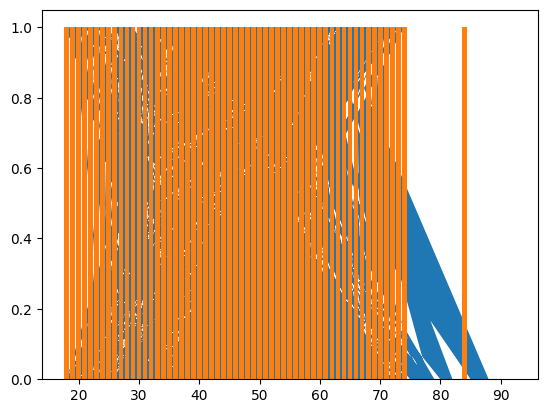

In [93]:
###visualization of before and after "Age vs Exited"



plt.fill_between(data["Age"],data["Exited"])
plt.bar(data["Age"],data["Exited"])


In [88]:
a=(result==0).sum()


In [89]:
b=(result==1).sum()

In [90]:
percent=b/a*100
percent

0    8.932462
dtype: float64

TypeError: Image data of dtype <U3 cannot be converted to float

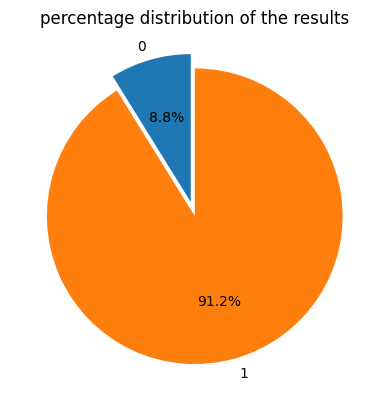

In [100]:

sizes=[8.837614
,100-8.837614
]


explode=[0.1,0]
plt.pie(sizes,labels=["0","1"],autopct="%1.1f%%",startangle=90,explode=explode);

plt.title("percentage distribution of the results")



plt.savefig("piechart.png")



# img=plt.imread("piechart.png")


# plt.imshow("img")

plt.show()


In [92]:
####Final Conclusion 


The 9 percent of the customers are likely to churn out of the bank 





SyntaxError: invalid syntax (718715485.py, line 4)